<a href="https://colab.research.google.com/github/AritraStark/Deeplense_GSOC_2022/blob/main/Deeplense_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset: 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip -qq gdrive/MyDrive/dataset_deeplense.zip
print('Extraction done.')

Mounted at /content/gdrive
Extraction done.


Setting up imports:

In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


Previewing the data:

Samples with no substructure: 


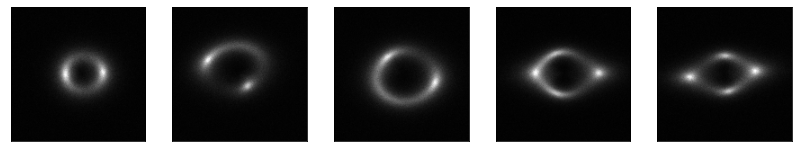

Samples with spherical substructure: 


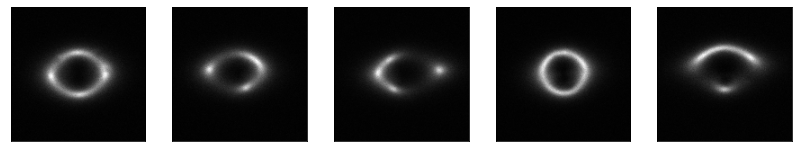

Samples with vortex substructure: 


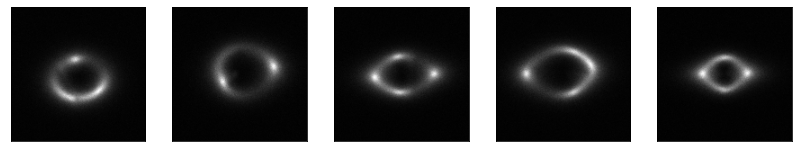

In [4]:
# Define the input paths
train_path1 = './dataset/train/no'
train_files1 = [os.path.join(train_path1, f) for f in os.listdir(train_path1) if f.endswith(".npy")]
train_path2 = './dataset/train/sphere'
train_files2 = [os.path.join(train_path2, f) for f in os.listdir(train_path2) if f.endswith(".npy")]
train_path3 = './dataset/train/vort'
train_files3 = [os.path.join(train_path3, f) for f in os.listdir(train_path3) if f.endswith(".npy")]

# Number of samples to display per class
n = 5

# Plot the samples 
i = 1
print('Samples with no substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files1[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with spherical substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files2[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with vortex substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files3[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1

In [5]:
# data1 = train_files1.to_numpy()
# data2 = train_files2.to_numpy()
# data3 = train_files3.to_numpy()

# data1.shape, data2.shape, data3.
train_files = train_files1 + train_files2 + train_files3
print(train_files)
del train_files1
del train_files2
del train_files3

data = []
for i in train_files:
  data.append(np.load(i))

['./dataset/train/no/6033.npy', './dataset/train/no/5122.npy', './dataset/train/no/3466.npy', './dataset/train/no/8169.npy', './dataset/train/no/2071.npy', './dataset/train/no/7806.npy', './dataset/train/no/698.npy', './dataset/train/no/736.npy', './dataset/train/no/1946.npy', './dataset/train/no/412.npy', './dataset/train/no/5808.npy', './dataset/train/no/9227.npy', './dataset/train/no/7303.npy', './dataset/train/no/7098.npy', './dataset/train/no/4138.npy', './dataset/train/no/4548.npy', './dataset/train/no/624.npy', './dataset/train/no/7531.npy', './dataset/train/no/225.npy', './dataset/train/no/415.npy', './dataset/train/no/3275.npy', './dataset/train/no/8195.npy', './dataset/train/no/432.npy', './dataset/train/no/7714.npy', './dataset/train/no/3125.npy', './dataset/train/no/1136.npy', './dataset/train/no/2764.npy', './dataset/train/no/8546.npy', './dataset/train/no/7938.npy', './dataset/train/no/3527.npy', './dataset/train/no/2861.npy', './dataset/train/no/6757.npy', './dataset/tra

In [6]:
X_data1 = np.concatenate(data)
X_data1.shape

(30000, 150, 150)

In [7]:
del data